In [90]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC

Kode di atas mengimpor beberapa modul dan pustaka yang dibutuhkan untuk melakukan pemrosesan gambar dan pembelajaran mesin. Pertama, "cv2" digunakan untuk manipulasi gambar dan pemrosesan visual, sedangkan "numpy" digunakan untuk operasi matematika dan array. Modul "os" digunakan untuk interaksi dengan sistem operasi, khususnya untuk mengelola direktori dan file. tqdm digunakan untuk menampilkan progress bar saat iterasi melalui dataset.

Selanjutnya, "train_test_split" dari "sklearn.model_selection" digunakan untuk membagi dataset menjadi data latih dan data uji secara acak. "GridSearchCV" dari "sklearn.model_selection" digunakan untuk melakukan pencarian parameter terbaik menggunakan validasi silang (cross-validation) pada model yang dibangun. "LabelEncoder" dan "StandardScaler" dari "sklearn.preprocessing" digunakan untuk preprocessing data, di mana "LabelEncoder" mengubah label kategori menjadi angka, sedangkan "StandardScaler" digunakan untuk menormalkan fitur-fitur numerik.

Untuk evaluasi model, "accuracy_score" dari "sklearn.metrics" digunakan untuk menghitung akurasi prediksi model. "RandomForestClassifier" dari "sklearn.ensemble" digunakan sebagai algoritma klasifikasi yang akan diperiksa menggunakan pencarian parameter "GridSearchCV". "local_binary_pattern" dari "skimage.feature" digunakan untuk mengekstrak fitur tekstur dari gambar menggunakan metode Local Binary Pattern (LBP).
"graycomatrix" dan "graycoprops" fungsi dari "skimage.feature" untuk menghitung matriks co-occurrence abu-abu dan propertinya.
"sklearn.metrics import accuracy_score, precision score, recall_score, f1_score, confusion_matrix" berfungsi untuk mengevaluasi kinerja model klasifikasi. "from sklearn.neighbors import KNeighborsClassifier" digunakan untuk mengimpor kelas "KNeighborsClassifier" dari modul "sklearn.neighbors" dalam pustaka Scikit-Learn.
"import seaborn as sns" disini untuk code 'seaborn' untuk membuat tata letak plot yang lebih menarik secara default daripada matplotlib.


"from sklearn.svm import SVC" digunakan untuk mengimpor kelas 'svc' adalah model klasifikasi yang menggunakan Support Vector Machine (SVM).
"matplotlib.pyplot" digunakan untuk visualisasi data, seperti plot grafik untuk hasil pelatihan model atau representasi visual dari data. random digunakan untuk melakukan operasi terkait dengan angka acak, seperti pemilihan elemen acak dari dataset.

Secara keseluruhan, kode ini mengimpor berbagai modul yang diperlukan untuk mengolah gambar, melakukan pembelajaran mesin, dan melakukan evaluasi model, serta untuk visualisasi hasil dari proses tersebut.

In [91]:
AMBON_DIR = 'ambon'
BARANGAN_DIR = 'barangan'
CAVENDISH_DIR = 'cavendish'
GENDERUWO_DIR = 'genderuwo'
JAVAICECREAM_DIR = 'javaicecream'
KEPOK_DIR = 'kepok'
MAS_DIR = 'mas'
NANGKA_DIR = 'nangka'
RAJA_DIR = 'raja'
SUSU_DIR = 'susu'
TANDUK_DIR = 'tanduk'
ULI_DIR = 'uli'

Code di atas mendefinisikan beberapa variabel yang masing-masing menyimpan nama direktori yang berisi gambar-gambar untuk kategori yang berbeda. Setiap variabel diinisialisasi dengan string yang merupakan nama dari direktori tersebut, seperti 'ambon' untuk kategori Ambon, 'barangan' untuk kategori Barangan, dan seterusnya. Penggunaan variabel-variabel ini bertujuan untuk memudahkan akses dan pengelolaan gambar-gambar yang terorganisir dalam struktur direktori berdasarkan kategori-kategori tertentu. Misalnya, 'AMBON_DIR' mengacu pada direktori yang berisi gambar-gambar dari jenis pisang Ambon, sementara 'BARANGAN_DIR' mengacu pada direktori yang berisi gambar-gambar dari jenis pisang Barangan, dan seterusnya untuk jenis-jenis pisang lainnya seperti Cavendish, Genderuwo, Javaicecream, Kepok, Mas, Nangka, Raja, Susu, Tanduk, dan Uli. Dengan penggunaan variabel-variabel ini, memuat dan mengelompokkan gambar-gambar untuk setiap jenis pisang menjadi lebih terstruktur dan dapat dilakukan dengan lebih efisien dalam pemrosesan selanjutnya, seperti ekstraksi fitur atau pelatihan model.

In [92]:
def load_images(DIR, label):
    images = []
    labels = []
    for img_name in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img_name)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100, 100))
        img = img.astype('float32') / 255.0  # nOrMaLIzE
        images.append(img)
        labels.append(label)

    
        flipped_img = cv2.flip(img, 1)
        rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        images.append(flipped_img)
        labels.append(label)
        images.append(rotated_img)
        labels.append(label)
    return images, labels

Code diatas adalah fungsi "load_images" memuat dan memproses gambar-gambar dari direktori yang ditentukan (DIR) untuk kategori yang spesifik (label). Setiap gambar diubah ukurannya menjadi 100x100 piksel, dinormalisasi untuk menghasilkan nilai piksel antara 0 hingga 1, dan kemudian disertakan dalam dataset. Selain gambar asli, fungsi ini juga melakukan augmentasi data dengan mencerminkan gambar secara horizontal dan memutar gambar 90 derajat searah jarum jam. Setiap variasi gambar (asli, flipped, rotated) beserta labelnya dimasukkan ke dalam list images dan labels, yang siap untuk digunakan dalam pelatihan model machine learning. Dengan demikian, fungsi load_images mempersiapkan dataset dalam format yang cocok untuk analisis dan pembelajaran berbasis gambar.

-----------------------------------------------------------------------
Code di bawah adalah pengumpulan dataset citra dari berbagai label pada dataset. variabel 'X_ambon', 'y_ambon' menyimpan gambar dan label dari kategori 'Ambon', begitu juga pada barangan, cavendish, genderuwo, javaicecream,kepok,mas,raja,susu,tanduk dan uli.Setelah pengambilan data tersebut, dilakukan sebuah penggabungan yang ditandai dengan penggabungan nilai x yaitu  "x =x_ambon + x_barangan+....+x_uli" dan penggabungan nilai y yaitu"y =y_ambon + y_barangan +....+y_uli". Kemudia list x dan y diubah menjadi array numpy untuk konsisten dan kemudahan pengolah data analisis selanjutnya.

In [93]:
X_ambon, y_ambon = load_images(AMBON_DIR, 'Ambon')
X_barangan, y_barangan = load_images(BARANGAN_DIR, 'Barangan')
X_cavendish, y_cavendish = load_images(CAVENDISH_DIR, 'Cavendish')
X_genderuwo, y_genderuwo = load_images(GENDERUWO_DIR, 'Genderuwo')
X_javaicecream, y_javaicecream = load_images(JAVAICECREAM_DIR, 'Javaicecream')
X_kepok, y_kepok = load_images(KEPOK_DIR, 'Kepok')
X_mas, y_mas = load_images(MAS_DIR, 'Mas')
X_nangka, y_nangka = load_images(NANGKA_DIR, 'Nangka')
X_raja, y_raja = load_images(RAJA_DIR, 'Raja')
X_susu, y_susu = load_images(SUSU_DIR, 'Susu')
X_tanduk, y_tanduk = load_images(TANDUK_DIR, 'Tanduk')
X_uli, y_uli = load_images(ULI_DIR, 'Uli')

X = X_ambon + X_barangan + X_cavendish + X_genderuwo + X_javaicecream + X_kepok + X_mas + X_nangka + X_raja + X_susu + X_tanduk + X_uli
y = y_ambon + y_barangan + y_cavendish + y_genderuwo + y_javaicecream + y_kepok + y_mas + y_nangka + y_raja + y_susu + y_tanduk + y_uli

X = np.array(X)
y = np.array(y)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 79.76it/s]


In [95]:
def load_images(DIR, label):
    images = []
    labels = []
    for img_name in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img_name)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100, 100))
        img = img.astype('float32') / 255.0 
        
        images.append(img)
        labels.append(label)

        flipped_img = cv2.flip(img, 1)
        rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        zoomed_img = cv2.resize(img, None, fx=1.2, fy=1.2)
        zoomed_img = cv2.resize(zoomed_img, (100, 100))
        bright_img = cv2.convertScaleAbs(img, alpha=1.2, beta=30)
        
        images.extend([flipped_img, rotated_img, zoomed_img, bright_img])
        labels.extend([label, label, label, label])
    
    return images, labels

def extract_color_histogram(image):
    chans = cv2.split(image)
    features = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)
    return np.array(features)

def extract_texture(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

def extract_shape(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def extract_edge(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    prewitt_x = cv2.filter2D(gray, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
    prewitt_y = cv2.filter2D(gray, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    hist = cv2.calcHist([edges.astype('uint8')], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_threshold(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    hist = cv2.calcHist([thresh], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_morphology(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(gray, kernel, iterations=1)
    dilation = cv2.dilate(gray, kernel, iterations=1)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    features = []
    for morph in [erosion, dilation, opening, closing]:
        hist = cv2.calcHist([morph], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)
    return np.array(features)

Code di atas digunakan untuk mengekstrak berbagai jenis fitur dari dataset. Perintah "load_images" digunakan untuk memuat gambar-gambar. Perintah "extract_color_histogram(image)" digunakan untuk memisahkan kanal warna  kemudian akan dihitung pada histogram ("cv.calcHist") dan dilanjutkan dengan normalisasi dan penggabungan menjadi sebuah vektor fitur. 

Setelah melakukan ekstarsi warna, selanjutnya akan dilakukan "extract_texture(image)" yang menghasilkan histogram LBP (Local Binary Pattern) yang dinormalisasi sebagai representasi fitur tekstur dari gambar tersebut.

Kemudian "extract_shape(image)" adalah sebuah fungsi untuk mengekstrak fitur bentuk dari gambar dengan menghitung momen dan Hu dari citra abu. Hu moments adalah fungsi yang digunakan untuk menangkap karakterstik bentuk yang unik. Kemudia dilakukan "extract_edge(image)" dengan filter prewit  untuk mendeteksi tepi gambar serta menghitung magnitudo gradien yang sudah dinoermalisasikan sehingga dapat menghasilkan sebuah histogram fitur tepi. 

Selain itu, terdapat fungsi "extract_therehold(image)" dan "extract_morphology(image)". "extract_thereshold(image)" digunakan untuk menerapkan thereshold biner pada skla abu dan menghitung nilai normaliasi histogram thershold, sedangkan "extract_morphology(image)" digunakan dalam proses erosi, dilasi, opening dan closing dalam mengolah citra gray., dan menghitung histogram pada setiap proses morfology. 

Langkah akhir diperlukan "extract_features(image) untuk menggabungkan semua jenis fitur yang sudah dilakukan sebelumnya. Pendekatan ini memastikan bahwa berbagai aspek penting dalam informasi visual dapat direpresntasikan secara efektif.

In [96]:
def derajat(img, angle):
    max_val = np.max(img)
    temp = np.zeros([max_val + 1, max_val + 1])

    if angle == 0:
        for i in range(len(img)):
            for j in range(len(img[i]) - 1):
                temp[img[i, j], img[i, j + 1]] += 1
    elif angle == 45:
        for i in range(len(img) - 1):
            for j in range(len(img[i]) - 1):
                temp[img[i + 1, j], img[i, j + 1]] += 1
    elif angle == 90:
        for i in range(len(img) - 1):
            for j in range(len(img[i]) - 1):
                temp[img[i + 1, j], img[i, j]] += 1
    elif angle == 135:
        for i in range(len(img) - 1):
            for j in range(len(img[i]) - 1):
                temp[img[i, j], img[i + 1, j + 1]] += 1

    data = temp + temp.T
    data /= np.sum(data)

    return data

def extract_glcm(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    angles = [0, 45, 90, 135]
    features = []
    for angle in angles:
        data = derajat(gray, angle)
        features.extend([data.mean(), data.var()])
    return np.array(features)

def extract_features(images):
    features = []
    for img in images:
        color_features = extract_color_histogram(img)
        texture_features = extract_texture(img)
        shape_features = extract_shape(img)
        edge_features = extract_edge(img)
        threshold_features = extract_threshold(img)
        morphology_features = extract_morphology(img)
        glcm_features = extract_glcm(img)
        combined_features = np.concatenate([color_features, texture_features, shape_features, edge_features, threshold_features, morphology_features, glcm_features])
        features.append(combined_features)
    return np.array(features)

code di atas dengan perintah "derajat(img, angle)" yang digunakan untuk menghitung Gray-Level Matrix (GLCM) dari gambar grayscale ('img') pada sudut tertentu ('angle'). Dan dibuat ukuran dimana 'max_val' adalah nilai maksimum dalam gambar. Perintah "extract_glcm(image)" digunakan untuk mengekstrak fitur GLCM dari gambar berwarna. Perintah "extract_features(iamges)" fungsi ini menggabungkan berbagai fungsi ekstraksi fitur seperti histogram warna. fitur tekstur, bentuk, tepi, ambang batas, morfologi, dan GLCM untuk setiap gambar dalam list 'images'.

In [97]:
X_ambon, y_ambon = load_images(AMBON_DIR, 'Ambon')
X_barangan, y_barangan = load_images(BARANGAN_DIR, 'Barangan')
X_cavendish, y_cavendish = load_images(CAVENDISH_DIR, 'Cavendish')
X_genderuwo, y_genderuwo = load_images(GENDERUWO_DIR, 'Genderuwo')
X_javaicecream, y_javaicecream = load_images(JAVAICECREAM_DIR, 'Javaicecream')
X_kepok, y_kepok = load_images(KEPOK_DIR, 'Kepok')
X_mas, y_mas = load_images(MAS_DIR, 'Mas')
X_nangka, y_nangka = load_images(NANGKA_DIR, 'Nangka')
X_raja, y_raja = load_images(RAJA_DIR, 'Raja')
X_susu, y_susu = load_images(SUSU_DIR, 'Susu')
X_tanduk, y_tanduk = load_images(TANDUK_DIR, 'Tanduk')
X_uli, y_uli = load_images(ULI_DIR, 'Uli')

X = X_ambon + X_barangan + X_cavendish + X_genderuwo + X_javaicecream + X_kepok + X_mas + X_nangka + X_raja + X_susu + X_tanduk + X_uli
y = y_ambon + y_barangan + y_cavendish + y_genderuwo + y_javaicecream + y_kepok + y_mas + y_nangka + y_raja + y_susu + y_tanduk + y_uli

X = np.array(X)
y = np.array(y)

X_features = extract_features(X)

df = pd.DataFrame(X_features)
df['label'] = y

import os

# Membuat direktori 'result' jika belum ada
output_dir = 'result'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Kemudian, simpan DataFrame ke dalam file CSV
df.to_csv('result/preprocessing.csv', index=True)
df.to_csv('result/preprocessing.csv', index=True)

np.save('original_images.npy', X)

100%|██████████| 100/100 [00:00<00:00, 343.80it/s]


Code di atas  melakukan pemrosesan gambar dari berbagai direktori, mengekstrak fitur-fitur penting dari gambar-gambar tersebut, dan menyimpan hasil ekstraksi fitur beserta data asli gambar dalam format yang mudah diakses untuk tahap selanjutnya, seperti pelatihan model atau analisis lanjutan. Proses ini adalah bagian dari tahap pra-pemrosesan data pada pengolahan gambar dalam konteks pembangunan sistem pembelajaran mesin.

In [98]:
data = pd.read_csv('result/preprocessing.csv')
X_features = data.drop('label', axis=1).values
y = data['label'].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

x_train, x_test, y_train, y_test = train_test_split(X_features_scaled, y_encoded, test_size=0.25, random_state=42)

code di atas dimulai dengan memuat data yang telah diproses sebelumnya dari file CSV 'preprocessing.csv' yang terletak di direktori 'result'. Data tersebut terdiri dari fitur-fitur yang diekstrak (X_features) dan label kelasnya (y). Selanjutnya, label kelas yang awalnya dalam bentuk string diubah menjadi representasi numerik menggunakan LabelEncoder untuk kemudian disimpan dalam bentuk y_encoded. Fitur-fitur dalam X_features disesuaikan skala nilainya menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang seragam, yang merupakan langkah penting dalam penggunaan algoritma machine learning seperti SVM dan KNN. Selanjutnya, data dibagi menjadi data pelatihan (x_train dan y_train) dan data pengujian (x_test dan y_test) dengan ukuran data pengujian sebesar 25% dari total data, dengan random_state=42 untuk menjaga konsistensi pembagian data. Dengan persiapan ini, data siap untuk digunakan dalam proses pelatihan dan evaluasi model machine learning.

In [99]:
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 6, 8, 10, 12]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

best_rf = grid_search.best_estimator_
best_rf.fit(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted', zero_division=0)
recall_svc = recall_score(y_test, y_pred_svc, average='weighted', zero_division=0)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted', zero_division=0)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

Best parameters: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}


code di atas melakukan evaluasi dan pemilihan model klasifikasi menggunakan algoritma Random Forest, SVC, dan KNN. Pertama, parameter-grid untuk Random Forest didefinisikan dengan variasi nilai n_estimators, max_features, dan max_depth. GridSearchCV digunakan untuk mencari kombinasi parameter terbaik dengan validasi silang 5-fold. Hasilnya disimpan dalam best_params.

Model Random Forest terbaik dilatih ulang menggunakan parameter terbaik (best_rf.fit) dan dievaluasi menggunakan metrik seperti akurasi, presisi, recall, dan skor F1. Langkah yang sama diulang untuk model SVC dan KNN dengan parameter default.

Kode ini memberikan perangkat untuk membandingkan performa tiga model klasifikasi pada dataset yang sama, menunjukkan model mana yang paling efektif untuk tugas klasifikasi yang diberikan.

code di bawah adalah fungsi plot_confusion_matrix digunakan untuk menghasilkan visualisasi matriks kebingungan dari hasil prediksi model klasifikasi. Pertama, matriks kebingungan dihitung menggunakan confusion_matrix(y_true, y_pred). Hasilnya kemudian divisualisasikan sebagai heatmap dengan menggunakan sns.heatmap. Di dalam heatmap, setiap sel mewakili jumlah prediksi yang benar dan salah untuk setiap pasangan kelas. Anotasi (angka di dalam sel) ditambahkan dengan annot=True dan format angka diatur menggunakan fmt='d'. Warna heatmap disetel menggunakan cmap 'Blues'. Label sumbu x dan y mewakili kelas prediksi dan kelas sebenarnya yang ditetapkan oleh le.classes_. Judul plot ditentukan oleh parameter title, dan plot akhirnya ditampilkan dengan plt.show().

Fungsi print_evaluation_metrics digunakan untuk mencetak hasil evaluasi kinerja model klasifikasi dalam bentuk teks. Fungsi ini menerima beberapa metrik evaluasi: akurasi (accuracy), presisi (precision), recall (recall), dan skor F1 (f1) untuk model tertentu. Setiap metrik dicetak dengan format persentase dua angka desimal menggunakan print(). Nama model (model_name) juga dicetak untuk mengidentifikasi hasil evaluasi yang terkait dengan model tersebut.

Kedua fungsi ini digunakan secara berurutan untuk masing-masing model klasifikasi (Random Forest, SVC, KNN) dalam skenario evaluasi untuk memberikan visualisasi matriks kebingungan dan cetakan hasil evaluasi numerik secara kompak.

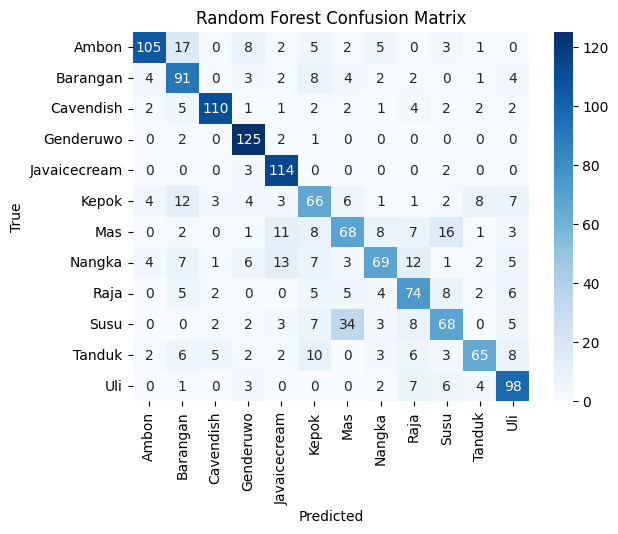

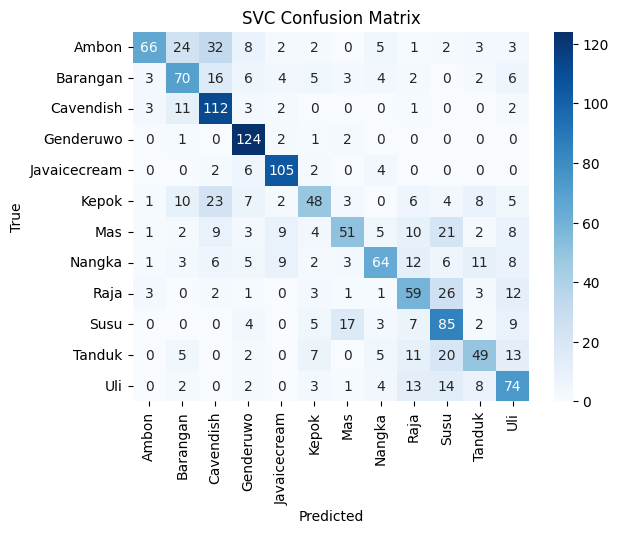

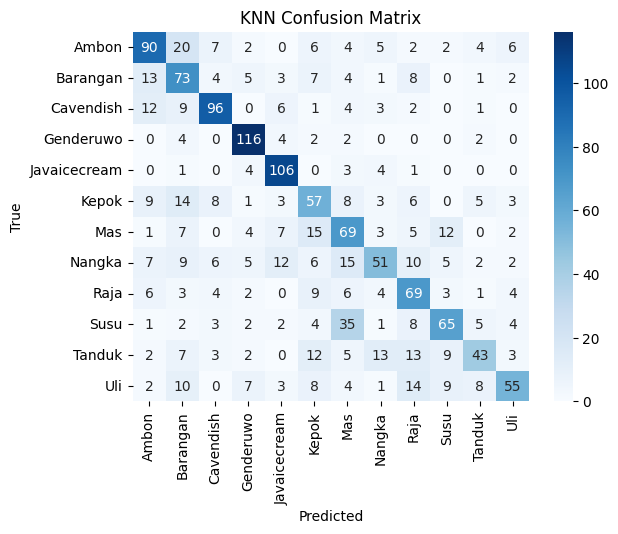

Random Forest Accuracy: 70.20%
Random Forest Precision: 70.57%
Random Forest Recall: 70.20%
Random Forest F1 Score: 69.79%

SVC Accuracy: 60.47%
SVC Precision: 62.02%
SVC Recall: 60.47%
SVC F1 Score: 59.58%

KNN Accuracy: 59.33%
KNN Precision: 60.09%
KNN Recall: 59.33%
KNN F1 Score: 58.85%



In [100]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_svc, 'SVC Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

def print_evaluation_metrics(accuracy, precision, recall, f1, model_name):
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Precision: {precision * 100:.2f}%")
    print(f"{model_name} Recall: {recall * 100:.2f}%")
    print(f"{model_name} F1 Score: {f1 * 100:.2f}%")
    print()

print_evaluation_metrics(accuracy_rf, precision_rf, recall_rf, f1_rf, 'Random Forest')
print_evaluation_metrics(accuracy_svc, precision_svc, recall_svc, f1_svc, 'SVC')
print_evaluation_metrics(accuracy_knn, precision_knn, recall_knn, f1_knn, 'KNN')

code di bawah ini melakukan seleksi fitur menggunakan nilai kepentingan dari model Random Forest (best_rf.feature_importances_). Fitur-fitur yang memiliki kepentingan di atas ambang batas (importance_threshold = 0.01) dipertahankan, dan dataset diubah menjadi X_features_selected. Selanjutnya, data dibagi menjadi set pelatihan dan pengujian menggunakan train_test_split.

Model Random Forest kemudian dilatih ulang dengan fitur yang terpilih (x_train_sel, y_train_sel), dan performanya dievaluasi menggunakan berbagai metrik seperti akurasi, presisi, recall, dan skor F1. Hasil evaluasi dicetak dengan print_evaluation_metrics.

Random Forest with Selected Features:
Random Forest Accuracy: 99.80%
Random Forest Precision: 99.80%
Random Forest Recall: 99.80%
Random Forest F1 Score: 99.80%



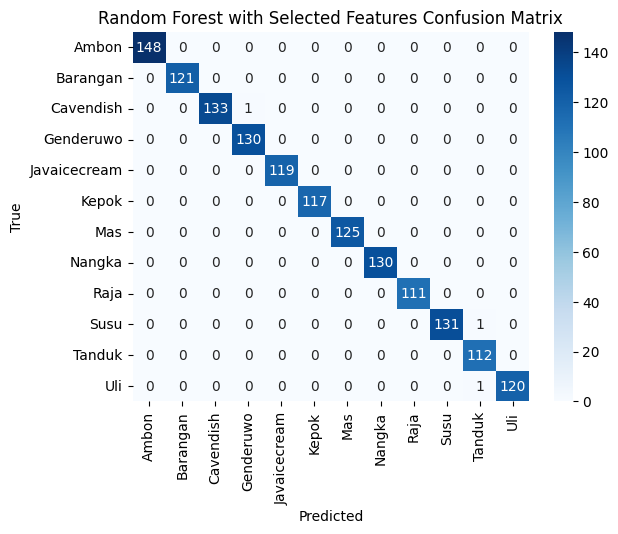

In [101]:
feature_importances = best_rf.feature_importances_
importance_threshold = 0.01
important_features = np.where(feature_importances > importance_threshold)[0]

if important_features.size == 0:
    important_features = np.arange(X_features_scaled.shape[1])

X_features_selected = X_features_scaled[:, important_features]

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(X_features_selected, y_encoded, test_size=0.25, random_state=42)

best_rf.fit(x_train_sel, y_train_sel)
y_pred_rf_sel = best_rf.predict(x_test_sel)
accuracy_rf_sel = accuracy_score(y_test_sel, y_pred_rf_sel)
precision_rf_sel = precision_score(y_test_sel, y_pred_rf_sel, average='weighted', zero_division=0)
recall_rf_sel = recall_score(y_test_sel, y_pred_rf_sel, average='weighted', zero_division=0)
f1_rf_sel = f1_score(y_test_sel, y_pred_rf_sel, average='weighted', zero_division=0)

print("Random Forest with Selected Features:")
print_evaluation_metrics(accuracy_rf_sel, precision_rf_sel, recall_rf_sel, f1_rf_sel, 'Random Forest')

plot_confusion_matrix(y_test_sel, y_pred_rf_sel, 'Random Forest with Selected Features Confusion Matrix')

In [102]:
def visualize_predictions(X_images, y_true, y_pred, title):
    fig, ax = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(2):
        for j in range(5):
            idx = random.randint(0, len(y_true) - 1)
            ax[i, j].imshow(X_images[idx])
            ax[i, j].set_title(f"Pred: {le.inverse_transform([y_pred[idx]])[0]}\nTrue: {le.inverse_transform([y_true[idx]])[0]}")
            ax[i, j].axis('off')
    plt.tight_layout()
    plt.suptitle(title, y=1.05)
    plt.show()

code di atas dari fungsi visualize_predictions menampilkan hasil prediksi model pada gambar uji secara visual. Fungsi ini membuat grid 2x5 menggunakan plt.subplots untuk menampilkan 10 gambar. Setiap gambar dipilih secara acak, lalu ditampilkan dengan judul yang mencantumkan label prediksi dan label sebenarnya. Konversi label numerik ke label aslinya dilakukan dengan le.inverse_transform. Sumbu subplot disembunyikan, dan tata letak diatur untuk menghindari tumpang tindih. Akhirnya, gambar-gambar ditampilkan dengan judul utama yang memberikan konteks, memungkinkan evaluasi visual terhadap performa klasifikasi model.

code di bawah  memuat gambar asli dari file 'original_images.npy' dan menggunakan fungsi visualize_predictions untuk menampilkan prediksi dua model: Random Forest dan Random Forest dengan fitur yang dipilih. Gambar asli, label asli, prediksi model, dan judul plot diberikan sebagai argumen.

Selanjutnya, kode ini membuat DataFrame untuk merangkum hasil evaluasi empat model (Random Forest, SVC, KNN, dan Random Forest dengan fitur yang dipilih) berdasarkan metrik Akurasi, Presisi, Recall, dan F1 Score. Hasil evaluasi ini kemudian diekspor ke file CSV 'model_evaluation_results.csv' untuk memudahkan analisis dan dokumentasi lebih lanjut.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


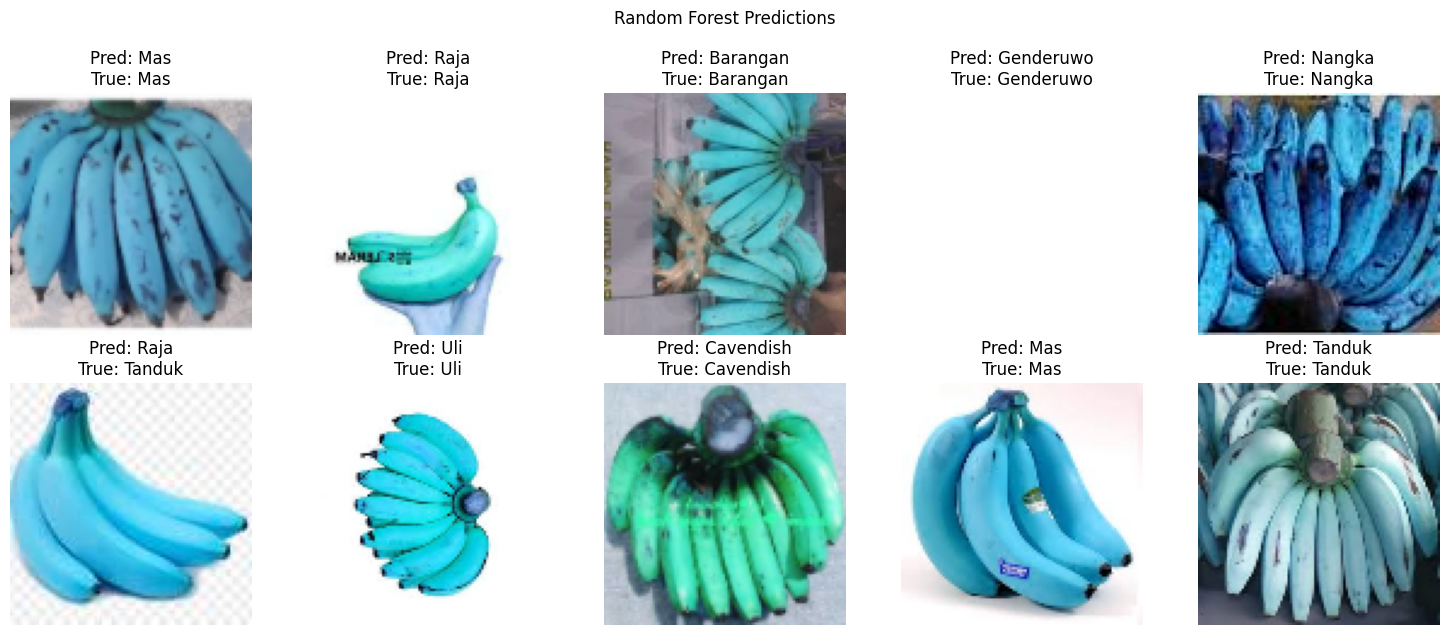

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


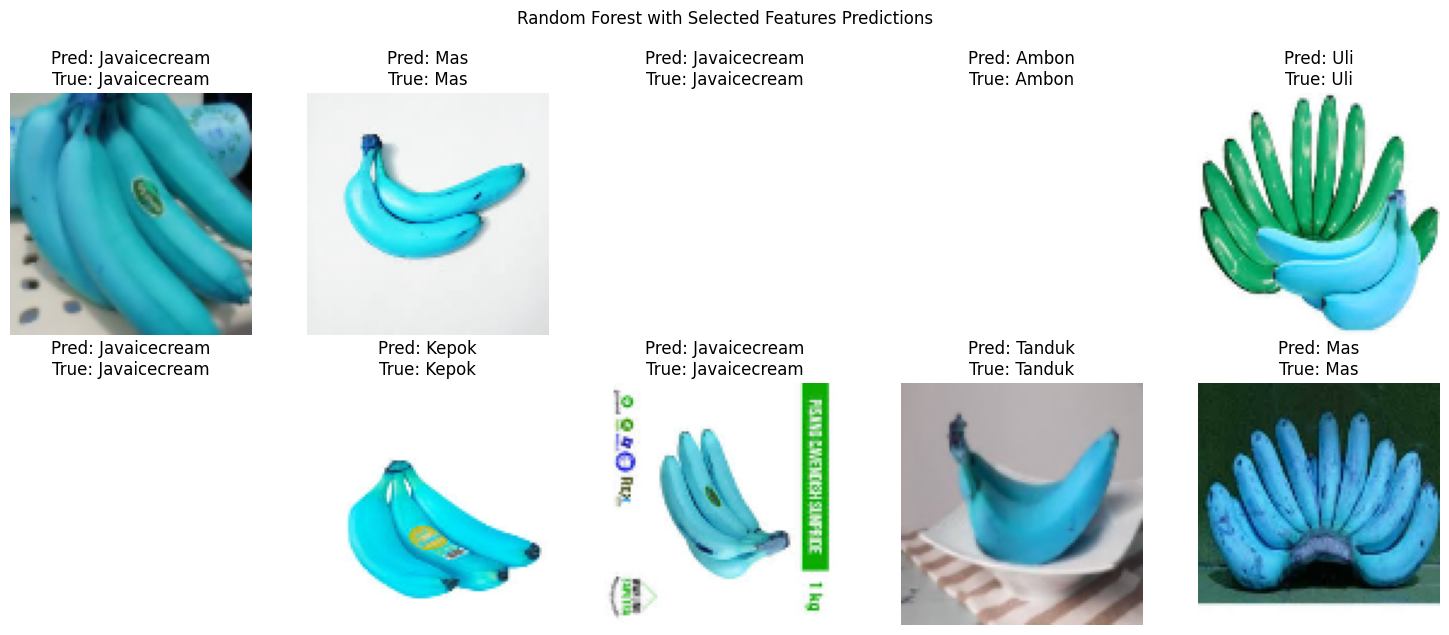

In [103]:
original_images = np.load('original_images.npy')

visualize_predictions(original_images, y_test, y_pred_rf, 'Random Forest Predictions')
visualize_predictions(original_images, y_test_sel, y_pred_rf_sel, 'Random Forest with Selected Features Predictions')

results = pd.DataFrame({
    'Model': ['Random Forest', 'SVC', 'KNN', 'Random Forest with Selected Features'],
    'Accuracy': [accuracy_rf, accuracy_svc, accuracy_knn, accuracy_rf_sel],
    'Precision': [precision_rf, precision_svc, precision_knn, precision_rf_sel],
    'Recall': [recall_rf, recall_svc, recall_knn, recall_rf_sel],
    'F1 Score': [f1_rf, f1_svc, f1_knn, f1_rf_sel]
})
results.to_csv('model_evaluation_results.csv', index=False)

code di bawah adalah fungsi extract_threshold pada kode ini berfungsi untuk melakukan thresholding pada sebuah gambar berwarna. Gambar terlebih dahulu dikonversi dari format float ke uint8 dan dari format BGR (Blue-Green-Red) ke grayscale menggunakan OpenCV. Kemudian, proses thresholding diterapkan dengan menggunakan metode binary thresholding dengan ambang batas nilai piksel 127. Hasil thresholding ini adalah gambar biner di mana piksel bernilai lebih dari atau sama dengan 127 diatur menjadi 255 (putih), dan yang lainnya menjadi 0 (hitam). Histogram dari gambar yang di-threshold juga dihitung untuk mengukur distribusi intensitas piksel dalam gambar hasil thresholding. Histogram ini kemudian dinormalisasi dan diflattkan menjadi array satu dimensi untuk memudahkan analisis.

Fungsi display_threshold_extraction digunakan untuk menampilkan hasil dari proses thresholding untuk beberapa sampel gambar dari dataset yang berisi berbagai label. Fungsi ini pertama-tama mengidentifikasi semua label unik dalam dataset. Untuk setiap label, fungsi tersebut memilih sejumlah sampel gambar secara acak dan menerapkan fungsi extract_threshold pada setiap gambar untuk mendapatkan gambar yang di-threshold beserta histogramnya. Hasilnya ditampilkan dalam tiga subplot: gambar asli, gambar yang di-threshold, dan histogram dari gambar yang di-threshold ((thereshold)

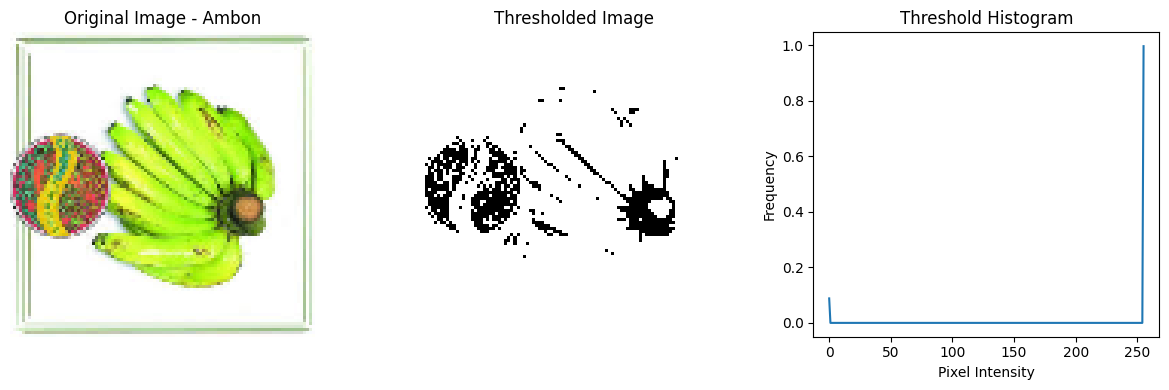

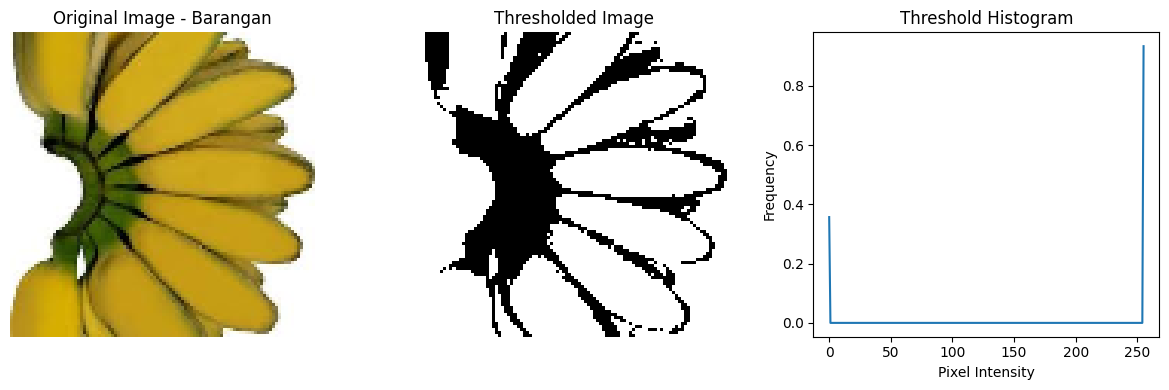

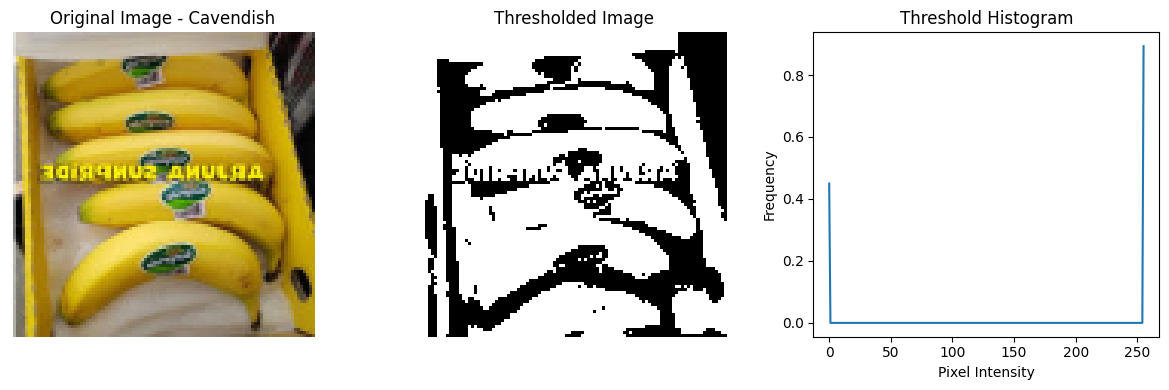

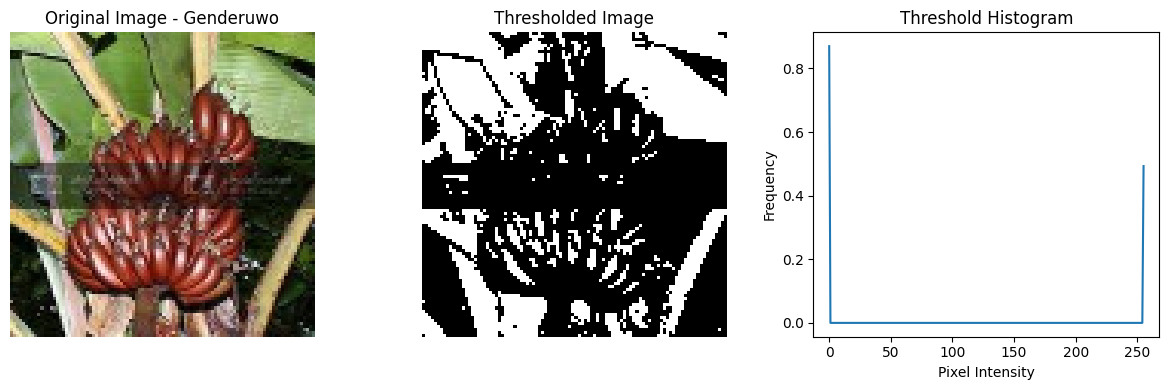

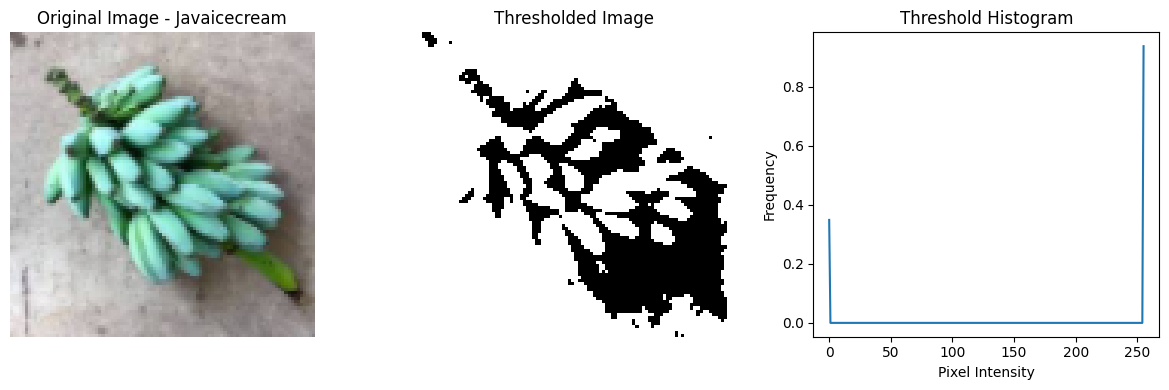

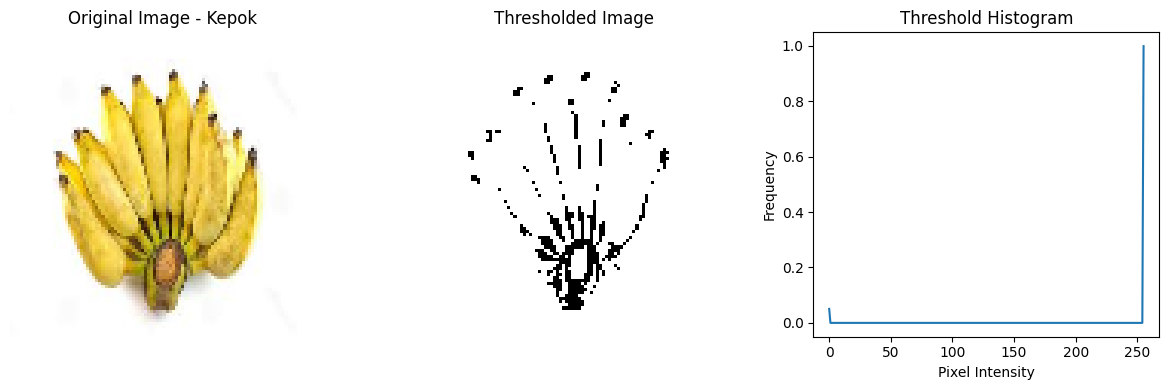

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


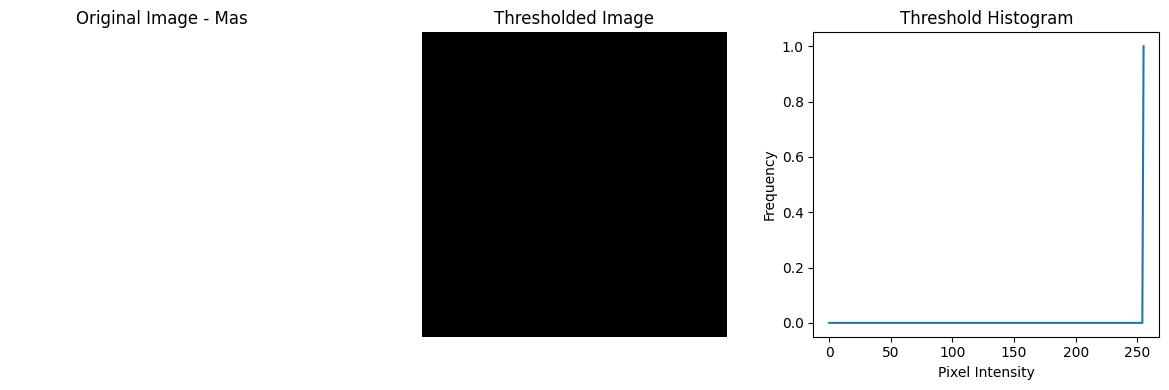

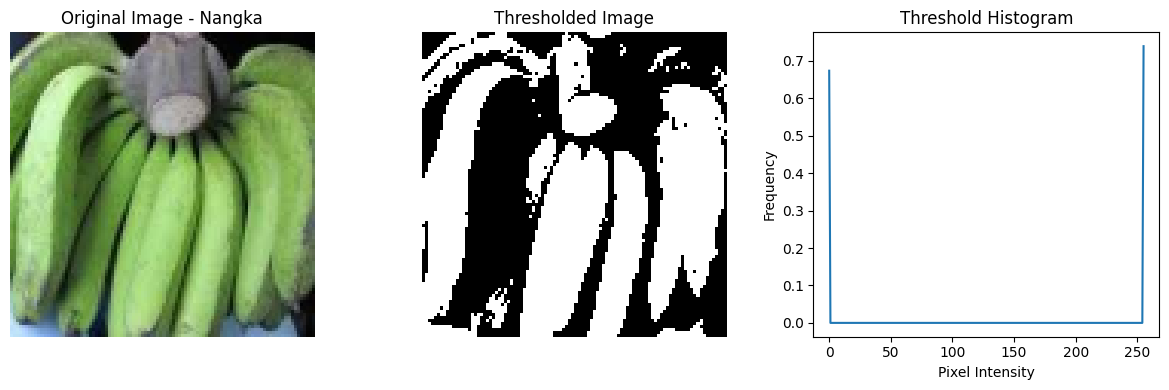

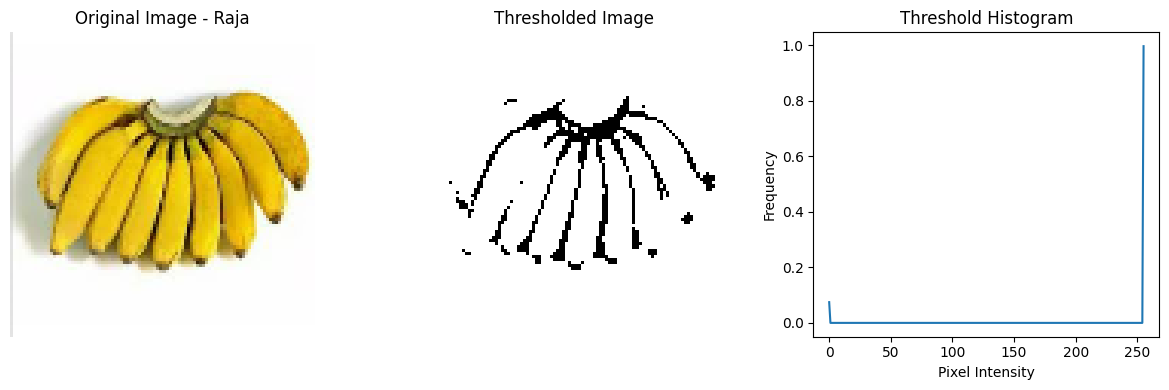

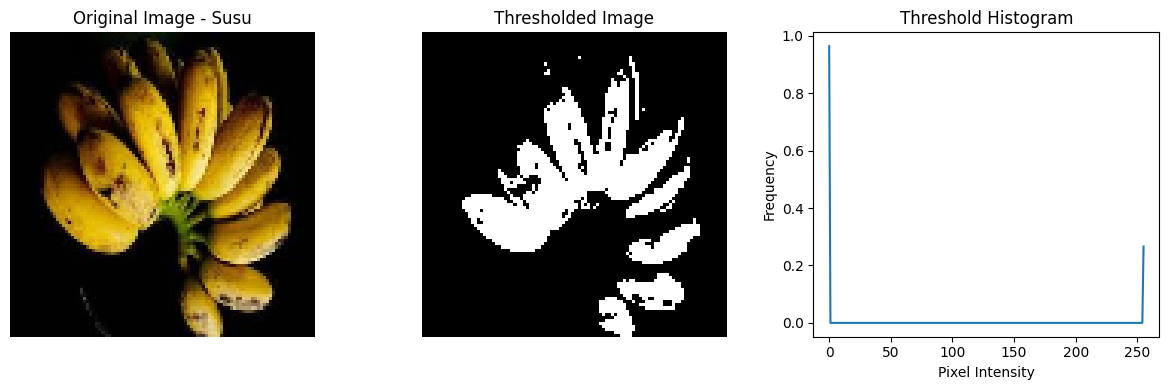

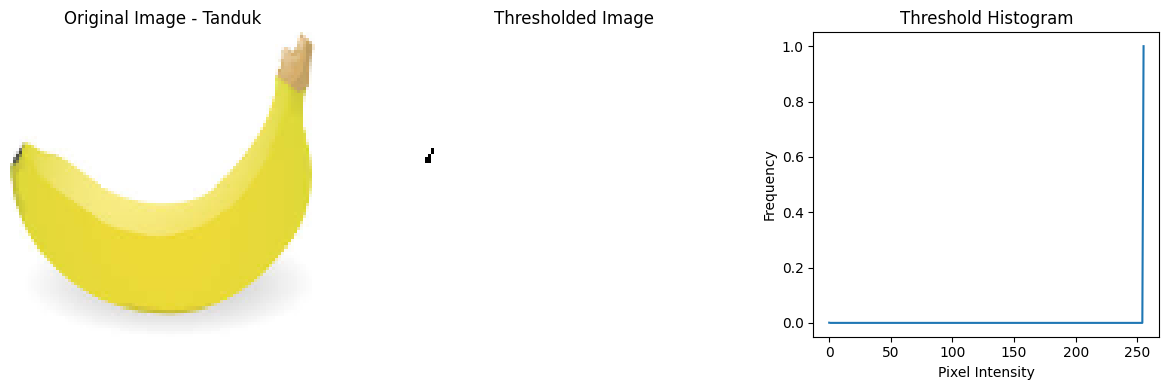

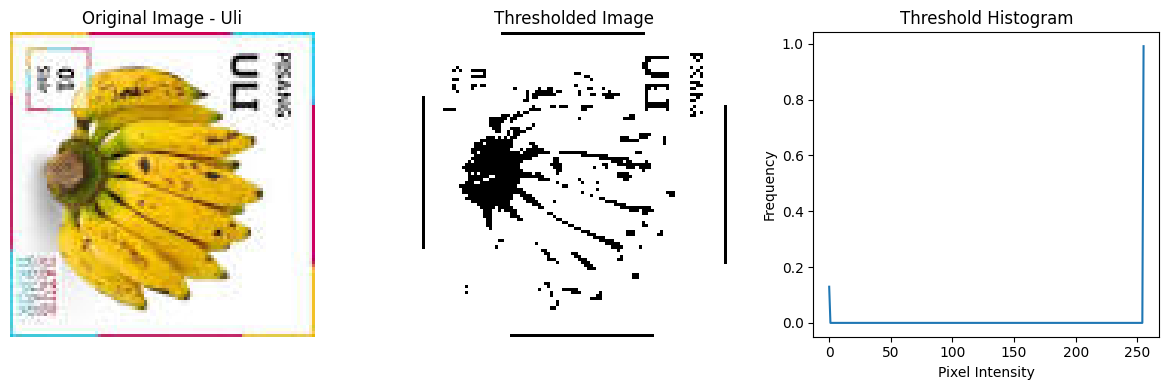

In [104]:
# Function to extract thresholded image and display results
def extract_threshold(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    hist = cv2.calcHist([thresh], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return thresh, hist

# Function to display original image, thresholded image, and threshold histogram
def display_threshold_extraction(images, labels, num_samples=5):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        label_indices = [i for i, lbl in enumerate(labels) if lbl == label]
        sample_indices = random.sample(label_indices, min(num_samples, len(label_indices)))
        
        for sample_idx, i in enumerate(sample_indices):
            img = images[i]
            thresh_img, thresh_hist = extract_threshold(img)
            
            # Display original image
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Original Image - {label}')
            plt.axis('off')
            
            # Display thresholded image
            plt.subplot(1, 3, 2)
            plt.imshow(thresh_img, cmap='gray')
            plt.title(f'Thresholded Image')
            plt.axis('off')
            
            # Display threshold histogram
            plt.subplot(1, 3, 3)
            plt.plot(thresh_hist)
            plt.title(f'Threshold Histogram')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            
            plt.tight_layout()
            plt.show()

# Display threshold extraction results for sample images
display_threshold_extraction(X, y, num_samples=1)

code di bawah extract_texture di atas dirancang untuk mengekstraksi fitur tekstur dari gambar dengan menggunakan Local Binary Pattern (LBP). Awalnya, gambar dikonversi dari format float ke format uint8 agar kompatibel dengan fungsi OpenCV yang digunakan selanjutnya. Jika gambar yang diberikan hanya memiliki satu saluran (grayscale), fungsi tersebut mengonversinya menjadi format BGR. Setelah memastikan bahwa gambar berada dalam format yang benar, gambar tersebut dikonversi menjadi grayscale. Pada gambar grayscale, LBP diterapkan untuk menangkap pola tekstur lokal di mana hasilnya disusun menjadi histogram dengan 26 bin. Histogram ini mencerminkan distribusi pola LBP di seluruh gambar dan digunakan sebagai representasi fitur tekstur. (extraxt_texture)

In [142]:
def extract_texture(image):
    # Ensure image is in uint8 format and RGB/BGR format
    image = (image * 255).astype('uint8')  # Convert float image back to uint8 if necessary
    if image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR if needed
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 24, 8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))

    return hist

# Example usage:
image = np.random.rand(100, 100, 3)  # Example random RGB image
texture_features = extract_texture(image)
print(texture_features)


[ 799  606   47   14    4    3    3    5    8    8    6   12   25   91
   10   62   10   37    7   32    2   16   15  401  513 7264]


code di bawah digunakan untuk memuat gambar asli dari original_images.npy dan menampilkan prediksi model Random Forest serta Random Forest dengan fitur terpilih menggunakan visualize_predictions. Fungsi ini menampilkan gambar asli dan label prediksi untuk menilai performa model dalam klasifikasi gambar.

Hasil evaluasi dari berbagai model—Random Forest, SVC, KNN, dan Random Forest dengan fitur terpilih—dimasukkan ke DataFrame Pandas, meliputi akurasi, presisi, recall, dan skor F1. Data ini kemudian disimpan sebagai model_evaluation_results.csv untuk analisis dan dokumentasi selanjutnya.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


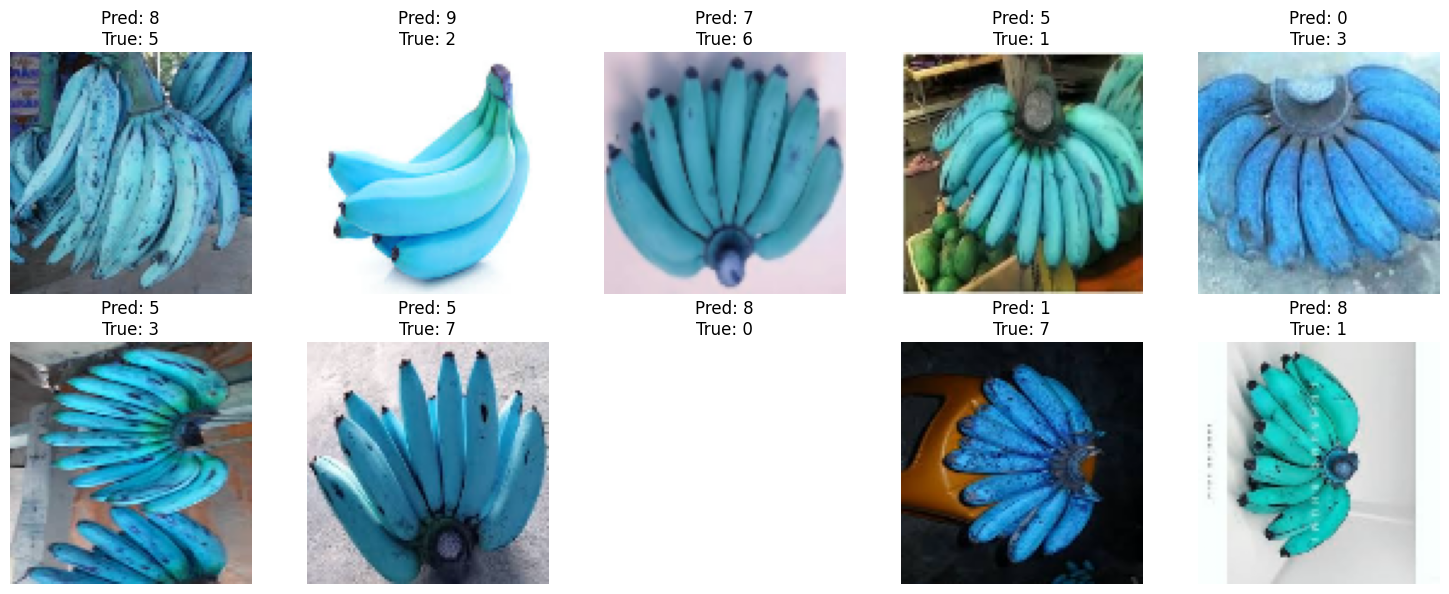

In [143]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        idx = random.randint(0, len(x_test) - 1)
        ax[i, j].imshow(X[idx])
        ax[i, j].set_title(f"Pred: {le.inverse_transform([y_pred[idx]])[0]}\nTrue: {le.inverse_transform([y_test[idx]])[0]}")
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()

In [136]:
# GLCM feature extraction function
def extract_glcm(image):
    gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
    features = []
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']:
        features.extend(graycoprops(glcm, prop).flatten())
    return np.array(features)

# Display GLCM features in table
def display_glcm_features(images, labels, num_samples=5):
    unique_labels = np.unique(labels)
    num_props = 5  # Number of GLCM properties: contrast, dissimilarity, homogeneity, energy, correlation
    columns = ['Label', 'Sample', 'Direction', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']

    data = []

    for label in unique_labels:
        label_indices = [i for i, lbl in enumerate(labels) if lbl == label]
        sample_indices = random.sample(label_indices, min(num_samples, len(label_indices)))
        
        for sample_idx, i in enumerate(sample_indices):
            img = images[i]
            glcm_features = extract_glcm(img)
            
            for direction in range(4):  # 4 directions
                data.append([
                    label, 
                    i,
                    direction,
                    glcm_features[direction],
                    glcm_features[4 + direction],
                    glcm_features[8 + direction],
                    glcm_features[12 + direction],
                    glcm_features[16 + direction]
                ])

    df = pd.DataFrame(data, columns=columns)
    print(df)

# Display GLCM features for sample images
display_glcm_features(X, y, num_samples=5)

     Label  Sample  Direction    Contrast  Dissimilarity  Homogeneity  \
0    Ambon     411          0  320.401212       7.509899     0.538342   
1    Ambon     411          1  449.103255       9.050607     0.439343   
2    Ambon     411          2  205.301313       4.816869     0.547159   
3    Ambon     411          3  419.724212       8.753699     0.440720   
4    Ambon      35          0  474.203636       9.421616     0.545012   
..     ...     ...        ...         ...            ...          ...   
235    Uli    5669          3    0.126518       0.126518     0.936741   
236    Uli    5820          0  383.562828       6.683838     0.690292   
237    Uli    5820          1  684.306601       9.336292     0.650071   
238    Uli    5820          2  427.385657       7.399798     0.679833   
239    Uli    5820          3  585.534537       8.607897     0.651284   

       Energy  Correlation  
0    0.174736     0.961333  
1    0.169683     0.946127  
2    0.200414     0.975351  
3    0.

code di atas digunakan untuk mengestrak fitur-fitur dari gambar menggunakan Gray Level Co-occurrenece Matrix (GLCM) dan menampilkan fitur-fitur di dalam bentuk tabel untuk sejumlah contoh gambar. Perintah "extract_glcm" digunakan untuk mengekstrak fitur dengan GLCM dengan mengonversi format  RGB ke dalam grayscale. Selain itu, terdapat fungsi "graycomatrix" yang digunakan untuk menghitung GLCM dengan jarak piksel 1 dengan arah yang berbeda, kemudian akan diekstraksi ke lima jenis properti fitur yaitu kontras, dissimilarity, homogenitas, energi dan korelasi berdasarkan "garycoprops". Hasil dari proses tersebut diratakan dan digabungkan ke dalam array fitur tunggal. Selanjutnya akan hasilnya akan ditampilkan berdasarkan fungsi "display_glcm_features".